<a href="https://colab.research.google.com/github/aniketddeshmukh/Minor_Lab/blob/main/A02_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Aniket Deshmukh

Reg No : M1910013

---



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df= pd.read_csv("cars1.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN,NaN
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN,NaN
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,24.0,6,200,81,3012,17.6,76,1,ford maverick,NaN,NaN,NaN,NaN,NaN
194,22.5,6,232,90,3085,17.6,76,1,amc hornet,NaN,NaN,NaN,NaN,NaN
195,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette,NaN,NaN,NaN,NaN,NaN
196,24.5,4,98,60,2164,22.1,76,1,chevrolet woody,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           198 non-null    float64
 1   cylinders     198 non-null    int64  
 2   displacement  198 non-null    int64  
 3   horsepower    198 non-null    object 
 4   weight        198 non-null    int64  
 5   acceleration  198 non-null    float64
 6   model         198 non-null    int64  
 7   origin        198 non-null    int64  
 8   car           198 non-null    object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
dtypes: float64(7), int64(5), object(2)
memory usage: 21.8+ KB


In [4]:
# Dropping columns 9 to 13 as they are blank or contains NaN values
df=df.drop(['Unnamed: 9'], axis=1)
df=df.drop(['Unnamed: 10'], axis=1)
df=df.drop(['Unnamed: 11'], axis=1)
df=df.drop(['Unnamed: 12'], axis=1)
df=df.drop(['Unnamed: 13'], axis=1)
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
193,24.0,6,200,81,3012,17.6,76,1,ford maverick
194,22.5,6,232,90,3085,17.6,76,1,amc hornet
195,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette
196,24.5,4,98,60,2164,22.1,76,1,chevrolet woody


In [5]:
# There are some '?' values in some columns. Checking which column has it
(df=='?').sum(axis=0)

mpg             0
cylinders       0
displacement    0
horsepower      2
weight          0
acceleration    0
model           0
origin          0
car             0
dtype: int64

In [6]:
#Replacing '?' with NaN
df["horsepower"]=df["horsepower"].replace("?",np.NaN)

df['horsepower'].fillna(df['horsepower'].median(), inplace=True)



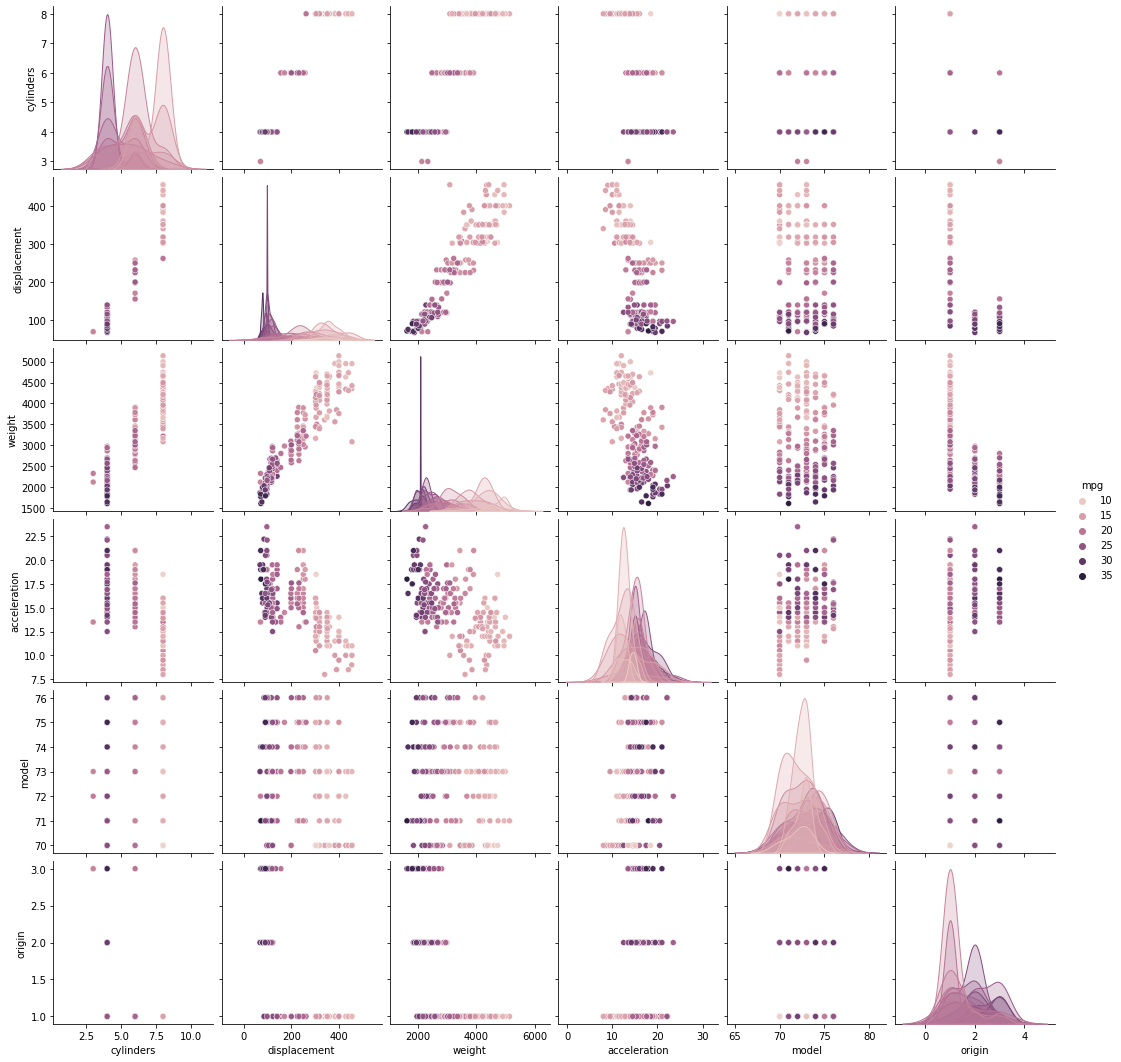

In [12]:
#Plotting Pair Plot
sns.pairplot(df, hue='mpg')

In [13]:
#Training with Linear Regression
from sklearn.model_selection import train_test_split
reg =linear_model.LinearRegression()
X = df[['mpg']]
y = df[['cylinders'	,'displacement','horsepower','weight','acceleration','model','origin']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20, random_state=10)
reg.fit(X_train,y_train)
print("training complete")


training complete


In [14]:
#Checking R^2 value
score_train = reg.score(X_train, y_train)
score_test = reg.score(X_test, y_test)
print('R^2 score for training data = %10.4f'%(score_train))
print('R^2 score for testing data  = %10.4f'%(score_test))

R^2 score for training data =     0.5402
R^2 score for testing data  =     0.5319


In [15]:
# Using Decision Tree 
tree_model=DecisionTreeRegressor()
tree_model.fit(X_train,y_train)
tree_r2=tree_model.score(X_test,y_test)
print(tree_r2)


0.46166380154007236


In [16]:
# Using Random Forest 
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
r2= rf.score(X_test,y_test)
print(r2)


0.46278032723045


In [17]:
reg.coef_

array([[-2.61357200e-01],
       [-1.69876968e+01],
       [-5.85674748e+00],
       [-1.42867869e+02],
       [ 2.47380877e-01],
       [ 6.56938937e-02],
       [ 8.06740682e-02]])

In [18]:
reg.intercept_

array([ 1.10911408e+01,  5.58742914e+02,  2.32502091e+02,  5.99721671e+03,
        1.00112116e+01,  7.15049802e+01, -1.40733545e-01])